In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
train_df = pd.read_csv("testfile.txt")
# 直接讀進來第一列會不見
train_df_first_row = train_df.columns
train_df.columns = ['x_train', 'y_train']
train_df_first_row = pd.DataFrame([train_df_first_row])
train_df_first_row.columns = ['x_train', 'y_train']
train_df = pd.concat([train_df_first_row, train_df], ignore_index=True)
x_train, y_train = train_df['x_train'], train_df['y_train']

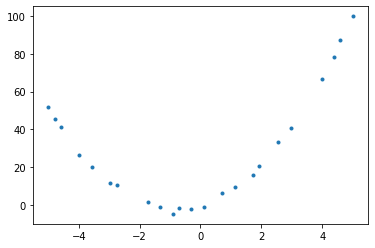

In [3]:
x_train = x_train.astype(np.float64) 
y_train = y_train.astype(np.float64)
plt.plot(x_train, y_train, '.')

In [4]:
def eliminate(r1, r2, col, target=0):
    fac = (r2[col]-target) / r1[col]
    for i in range(len(r2)):
        r2[i] -= fac * r1[i]
def gauss(A):
    for i in range(len(A)):
        if A[i][i] == 0:
            for j in range(i+1, len(A)):
                if A[i][j] != 0:
                    A[i], A[j] = A[j], A[i]
                    break
            else:
                # rank < n
                raise ValueError("Matrix is not invertible")
        for j in range(i+1, len(A)):
            eliminate(A[i], A[j], i)
    for i in range(len(A)-1, -1, -1):
        for j in range(i-1, -1, -1):
            eliminate(A[i], A[j], i)
    for i in range(len(A)):
        eliminate(A[i], A[i], i, target=1)
    return A  
def inverse(A):
    tmp = copy.deepcopy(A)
    tmp = np.concatenate((tmp, np.identity(len(A))), axis=1)
    """
    for i,row in enumerate(A):
        assert len(row) == len(A)
        tmp[i].extend(row + [0]*i + [1] + [0]*(len(A)-i-1))
    """
    #print(tmp)
    gauss(tmp)
    #print(tmp)
    #ret = []
    ret = tmp[:, (tmp.shape[1]//2):]
    """
    for i in range(len(tmp)):
        ret.append(tmp[i][(tmp[i].shape[0])//2:])
    """
    #print(ret)
    return ret




In [5]:
def LSE(x_train, y_train, n, lamda):
    X_b = np.expand_dims(np.power(x_train, n-1), axis=1)
    for i in range(n-2, -1, -1):
        X_b = np.append(X_b, np.expand_dims(np.power(x_train, i), axis=1), axis=1)
    #print(X_b)
    y_train = np.expand_dims(y_train, axis=1)
    X_b_T = np.transpose(X_b)
    sol = inverse(X_b_T.dot(X_b) + np.identity(len(X_b_T))*lamda).dot(X_b_T).dot(y_train)
    sol = sol.tolist()
    fitting_line = ""
    for i in range(len(sol)-1, -1, -1):
        if i==0:
            fitting_line += str(sol[len(sol)-1-i][0])
        else:
            fitting_line += str(sol[len(sol)-1-i][0]) + "X^" + str(i) + " + "
    cost = cal_error(sol, X_b, y_train)
    return sol, fitting_line, cost
def Newton(x_train, y_train, n, lamda):
    X_b = np.expand_dims(np.power(x_train, n-1), axis=1)
    for i in range(n-2, -1, -1):
        X_b = np.append(X_b, np.expand_dims(np.power(x_train, i), axis=1), axis=1)
    y_train = np.expand_dims(y_train, axis=1)
    X_b_T = np.transpose(X_b)
    sol = inverse(X_b_T.dot(X_b)).dot(X_b_T).dot(y_train)
    sol = sol.tolist()
    fitting_line = ""
    for i in range(len(sol)-1, -1, -1):
        if i==0:
            fitting_line += str(sol[len(sol)-1-i][0])
        else:
            fitting_line += str(sol[len(sol)-1-i][0]) + "X^" + str(i) + " + "
    cost = cal_error(sol, X_b, y_train)
    return sol, fitting_line, cost

In [6]:
def cal_error(theta, X, Y):
    predictions = X.dot(theta)
    cost =  np.sum(np.square(predictions-Y))
    return cost


In [7]:
def draw(x_data, y_data, sol):
    sol = np.squeeze(sol)
    polynomial = np.poly1d(sol)
    x_axis = np.linspace(-6, 6)
    y_axis = polynomial(x_axis)
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 2, 1])
    axes.plot(x_axis, y_axis)
    axes.plot(x_data, y_data, '.')
    plt.show()


Case 1: n = 2,lamda = 0
LSE:
Fitting line: 4.432950310076761X^1 + 29.306404706056266
Total error: 16335.123164957968
Newton's Method:
Fitting line: 4.432950310076761X^1 + 29.306404706056266
Total error: 16335.123164957968


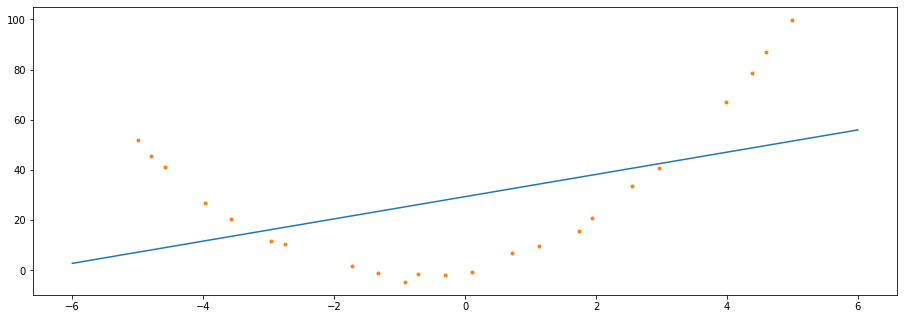

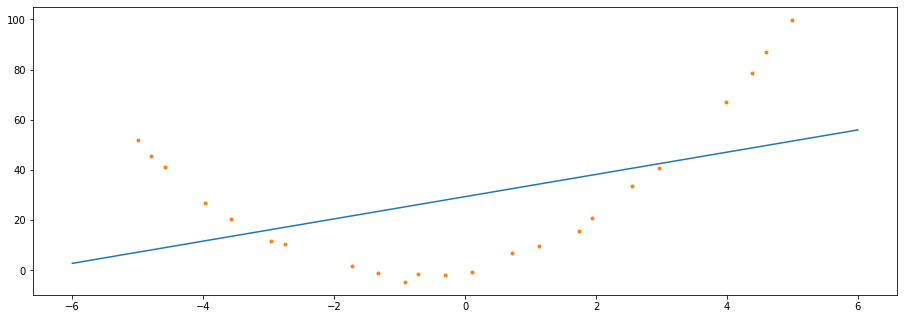



Case 2: n = 3,lamda = 0
LSE:
Fitting line: 3.02385339348282X^2 + 4.906190263863844X^1 + -0.2314017560877506
Total error: 26.55995949933298
Newton's Method:
Fitting line: 3.02385339348282X^2 + 4.906190263863844X^1 + -0.2314017560877506
Total error: 26.55995949933298


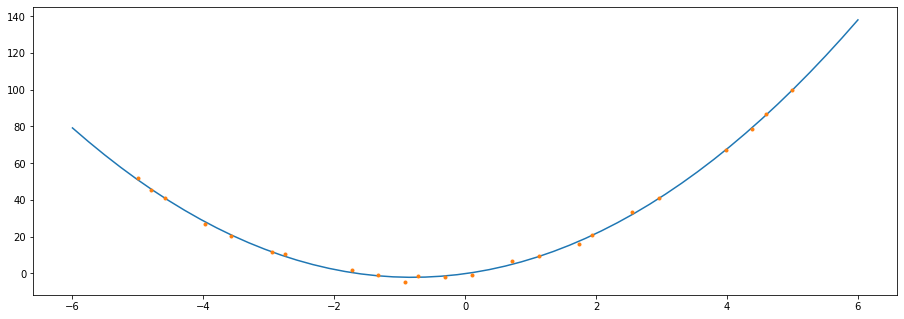

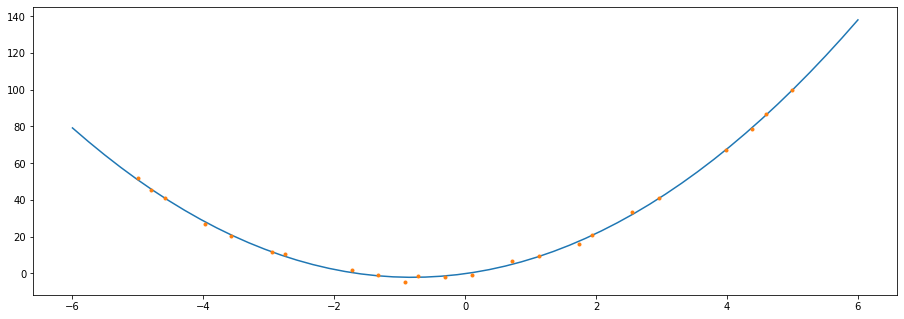



Case 3: n = 3,lamda = 10000
LSE:
Fitting line: 0.8345332826989835X^2 + 0.09314819831910819X^1 + 0.046950699273492914
Total error: 22649.738493046018
Newton's Method:
Fitting line: 3.02385339348282X^2 + 4.906190263863844X^1 + -0.2314017560877506
Total error: 26.55995949933298


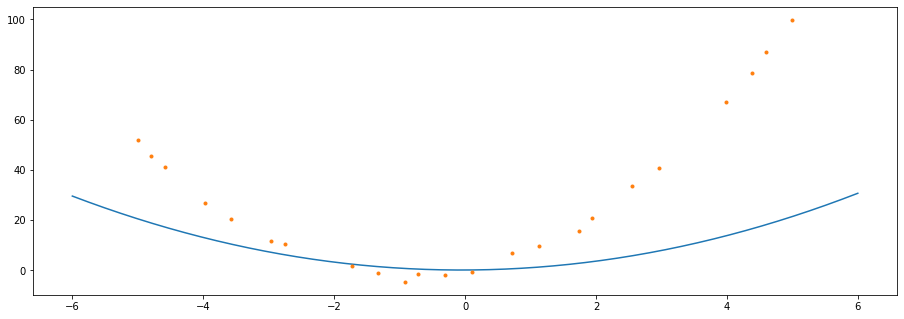

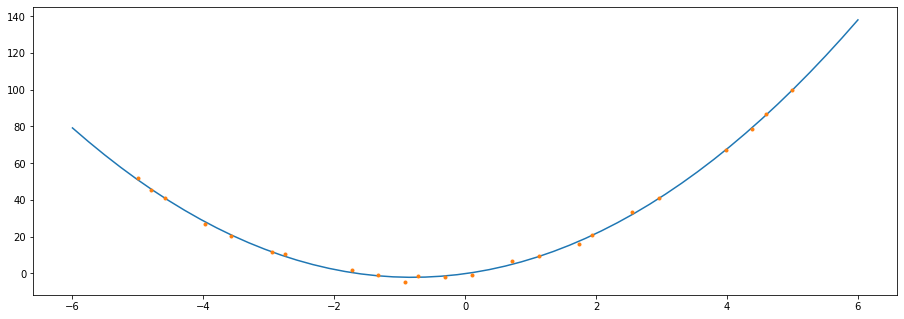

In [8]:
n = [2, 3, 3]
lamda = [0, 0, 10000]
for j in range(3):
    print("Case {}: n = {},lamda = {}".format(j+1, n[j], lamda[j]))
    sol_LSE, fitting_line, cost = LSE(x_train, y_train, n[j], lamda[j])
    print("LSE:")
    print("Fitting line: {}".format(fitting_line))
    print("Total error: {}".format(cost))
    #print("\n")
    sol_Newton, fitting_line, cost = Newton(x_train, y_train, n[j], lamda[j])
    print("Newton's Method:")
    print("Fitting line: {}".format(fitting_line))
    print("Total error: {}".format(cost))
    draw(x_train, y_train, sol_LSE)
    draw(x_train, y_train, sol_Newton)
    print("\n")
    
